## 6.3 Geographic Visualization 

#### This script contains the following:
1. Import data and libraries
2. Data wrangling and cleaning
3. Plotting a choropleth
4. Results

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json
import plotly
import plotly.express as px

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Import ".json" file for the United States. 

us_states_geo = r'C:\Users\mgril\OneDrive\Desktop\UFC project folder\Json maps\us-states.json'

In [4]:
# Checking the JSON file contents:

f = open(r'C:\Users\mgril\OneDrive\Desktop\UFC project folder\Json maps\us-states.json',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [5]:
# Import ".json" file for the World. 

world_geo = r'C:\Users\mgril\OneDrive\Desktop\UFC project folder\Json maps\world-countries.json'

In [6]:
# Checking the JSON file contents:

f = open(r'C:\Users\mgril\OneDrive\Desktop\UFC project folder\Json maps\world-countries.json',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'properties': {'name': 'Afghanistan'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[61.210817, 35.650072], [62.230651, 35.270664], [62.984662, 35.404041], [63.193538, 35.857166], [63.982896, 36.007957], [64.546479, 36.312073], [64.746105, 37.111818], [65.588948, 37.305217], [65.745631, 37.661164], [66.217385, 37.39379], [66.518607, 37.362784], [67.075782, 37.356144], [67.83, 37.144994], [68.135562, 37.023115], [68.859446, 37.344336], [69.196273, 37.151144], [69.518785, 37.608997], [70.116578, 37.588223], [70.270574, 37.735165], [70.376304, 38.138396], [70.806821, 38.486282], [71.348131, 38.258905], [71.239404, 37.953265], [71.541918, 37.905774], [71.448693, 37.065645], [71.844638, 36.738171], [72.193041, 36.948288], [72.63689, 37.047558], [73.260056, 37.495257], [73.948696, 37.421566], [74.980002, 37.41999], [75.158028, 37.133031], [74.575893, 37.020841], [74.067552, 36.836176], [72.920025, 36.720007], [71.846292, 36.509942], [71.262348, 36.074388], [71.498768,

In [7]:
# Define path

path = r'C:\Users\mgril\OneDrive\Desktop\UFC project folder'

In [8]:
# import UFC data set
df_UFC = pd.read_csv(os.path.join(path,  'Prepared data UFC', 'UFC_wrangled.csv'), index_col = False, skipinitialspace = True)

In [9]:
# checking the first 5 rows and all of the columns in the imported data set
df_UFC.head()

,Unnamed: 0,r_fighter,b_fighter,date_of_fight,year_of_fight,city,state,country,winner,r_winner,...,r_win_unam,r_win_tko,r_win_sub,r_win_dr_stop,r_stance,r_height_cms,r_reach_cms,r_weight_lbs,b_age,r_age
0,0,Royce Gracie,Patrick Smith,3/11/1994,1994,Denver,Colorado,United States of America,Red,1,...,0,0,3,0,Southpaw,185.42,183.57,175,30,27
1,1,Patrick Smith,Scott Morris,3/11/1994,1994,Denver,Colorado,United States of America,Red,1,...,0,0,2,0,Orthodox,187.96,183.57,225,31,30
2,2,Royce Gracie,Remco Pardoel,3/11/1994,1994,Denver,Colorado,United States of America,Red,1,...,0,0,2,0,Southpaw,185.42,183.57,175,28,27
3,3,Remco Pardoel,Orlando Wiet,3/11/1994,1994,Denver,Colorado,United States of America,Red,1,...,0,0,1,0,Southpaw,190.50,183.57,260,36,30
4,4,Patrick Smith,Johnny Rhodes,3/11/1994,1994,Denver,Colorado,United States of America,Red,1,...,0,0,1,0,Orthodox,187.96,183.57,225,39,30


In [10]:
# checking total amount of rows and columns
df_UFC.shape

(5901, 38)

In [11]:
#changing column names to keep consistent format
df_UFC.rename(columns = {'R_fighter':'r_fighter','B_fighter':'b_fighter','date':'date_of_fight','Winner':'winner','B_wins':'b_wins','B_losses':'b_losses','B_draw':'b_draw','B_win_by_Decision_Majority':'b_win_by_decision_majority','B_win_by_Decision_Split':'b_win_by_decision_split','B_win_by_Decision_Unanimous':'b_win_by_decision_unanimous','B_win_by_KO/TKO':'b_win_by_ko/tko','B_win_by_Submission':'b_win_by_submission','B_win_by_TKO_Doctor_Stoppage':'b_win_by_tko_doctor_stoppage','B_Stance':'b_stance','B_Height_cms':'b_height_cms','B_Reach_cms':'b_Reach_cms','B_Weight_lbs':'b_weight_lbs','R_wins':'r_wins','R_losses':'r_losses','R_draw':'r_draw','R_win_by_Decision_Majority':'r_win_by_decision_majority','R_win_by_Decision_Split':'r_win_by_decision_split','R_win_by_Decision_Unanimous':'r_win_by_decision_unanimous','R_win_by_KO/TKO':'r_win_by_ko/tko','R_win_by_Submission':'r_win_by_submission','R_win_by_TKO_Doctor_Stoppage':'r_win_by_tko_doctor_stoppage','R_Stance':'r_stance','R_Height_cms':'r_height_cms','R_Reach_cms':'r_Reach_cms','R_Weight_lbs':'r_weight_lbs','B_age':'b_age','R_age':'r_age'}, inplace = True)

In [12]:
#checking changes applied
df_UFC.head()

,Unnamed: 0,r_fighter,b_fighter,date_of_fight,year_of_fight,city,state,country,winner,r_winner,...,r_win_unam,r_win_tko,r_win_sub,r_win_dr_stop,r_stance,r_height_cms,r_reach_cms,r_weight_lbs,b_age,r_age
0,0,Royce Gracie,Patrick Smith,3/11/1994,1994,Denver,Colorado,United States of America,Red,1,...,0,0,3,0,Southpaw,185.42,183.57,175,30,27
1,1,Patrick Smith,Scott Morris,3/11/1994,1994,Denver,Colorado,United States of America,Red,1,...,0,0,2,0,Orthodox,187.96,183.57,225,31,30
2,2,Royce Gracie,Remco Pardoel,3/11/1994,1994,Denver,Colorado,United States of America,Red,1,...,0,0,2,0,Southpaw,185.42,183.57,175,28,27
3,3,Remco Pardoel,Orlando Wiet,3/11/1994,1994,Denver,Colorado,United States of America,Red,1,...,0,0,1,0,Southpaw,190.50,183.57,260,36,30
4,4,Patrick Smith,Johnny Rhodes,3/11/1994,1994,Denver,Colorado,United States of America,Red,1,...,0,0,1,0,Orthodox,187.96,183.57,225,39,30


In [13]:
# descriptive statistics of the dataset
df_UFC.describe()

,Unnamed: 0,year_of_fight,r_winner,b_winner,b_wins,b_losses,b_win_maj,b_win_split,b_win_unam,b_win_tko,...,r_win_split,r_win_unam,r_win_tko,r_win_sub,r_win_dr_stop,r_height_cms,r_reach_cms,r_weight_lbs,b_age,r_age
count,5901.000000,5901.000000,5901.000000,5901.000000,5901.000000,5901.000000,5901.000000,5901.00000,5901.000000,5901.000000,...,5901.000000,5901.000000,5901.000000,5901.000000,5901.000000,5901.000000,5901.000000,5901.000000,5901.000000,5901.000000
mean,2950.996611,2013.374174,0.674123,0.325877,2.581766,1.537367,0.016268,0.21759,0.836977,0.894086,...,0.307236,1.253516,1.296560,0.796475,0.069819,179.000437,183.577553,170.690561,29.359092,29.589731
std,1703.622153,5.563864,0.468741,0.468741,3.306896,1.932374,0.127849,0.52410,1.364885,1.578392,...,0.620822,1.684261,1.850654,1.355626,0.275323,8.820405,10.227429,35.715678,4.088473,4.149734
min,0.000000,1994.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,152.400000,152.400000,115.000000,18.000000,19.000000
25%,1476.000000,2010.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,172.720000,177.800000,145.000000,26.000000,27.000000
50%,2951.000000,2014.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,180.340000,183.570000,170.000000,29.000000,29.000000
75%,4426.000000,2018.000000,1.000000,1.000000,4.000000,2.000000,0.000000,0.00000,1.000000,1.000000,...,0.000000,2.000000,2.000000,1.000000,0.000000,185.420000,190.500000,185.000000,32.000000,32.000000
max,5901.000000,2021.000000,1.000000,1.000000,23.000000,16.000000,2.000000,5.00000,10.000000,11.000000,...,5.000000,10.000000,11.000000,13.000000,2.000000,210.820000,213.360000,345.000000,51.000000,47.000000


In [14]:
#check if there is mixed data types 
for col in df_UFC.columns.tolist():
  weird = (df_UFC[[col]].applymap(type) != df_UFC[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_UFC[weird]) > 0:
    print (col)


In [15]:
#change the datatype of the b_stance column 
df_UFC['b_stance'] = df_UFC['b_stance'].astype(str)


In [16]:
#change the datatype of the b_stance column 
df_UFC['r_stance'] = df_UFC['r_stance'].astype(str)

In [17]:
#change the datatype of the b_stance column 
df_UFC['country'] = df_UFC['country'].astype(str)

In [18]:
#recheck for mixed data types
for col in df_UFC.columns.tolist():
  weird = (df_UFC[[col]].applymap(type) != df_UFC[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_UFC[weird]) > 0:
    print (col)

In [19]:
#describe the datatypes
df_UFC.dtypes

Unnamed: 0         int64
r_fighter         object
b_fighter         object
date_of_fight     object
year_of_fight      int64
city              object
state             object
country           object
winner            object
r_winner           int64
b_winner           int64
weight_class      object
b_wins             int64
b_losses           int64
b_win_maj          int64
b_win_split        int64
b_win_unam         int64
b_win_tko          int64
b_win_sub          int64
b_win_dr_stop      int64
b_stance          object
b_height_cms     float64
b_reach_cms      float64
b_weight_lbs       int64
r_wins             int64
r_losses           int64
r_win_maj          int64
r_win_split        int64
r_win_unam         int64
r_win_tko          int64
r_win_sub          int64
r_win_dr_stop      int64
r_stance          object
r_height_cms     float64
r_reach_cms      float64
r_weight_lbs       int64
b_age              int64
r_age              int64
dtype: object

In [20]:
#find any missing values 
df_UFC.isnull().sum()

Unnamed: 0       0
r_fighter        0
b_fighter        0
date_of_fight    0
year_of_fight    0
city             0
state            0
country          0
winner           0
r_winner         0
b_winner         0
weight_class     0
b_wins           0
b_losses         0
b_win_maj        0
b_win_split      0
b_win_unam       0
b_win_tko        0
b_win_sub        0
b_win_dr_stop    0
b_stance         0
b_height_cms     0
b_reach_cms      0
b_weight_lbs     0
r_wins           0
r_losses         0
r_win_maj        0
r_win_split      0
r_win_unam       0
r_win_tko        0
r_win_sub        0
r_win_dr_stop    0
r_stance         0
r_height_cms     0
r_reach_cms      0
r_weight_lbs     0
b_age            0
r_age            0
dtype: int64

In [21]:
#check for any duplicates 
df_dups = df_UFC[df_UFC.duplicated()]
df_dups.head(20)

,Unnamed: 0,r_fighter,b_fighter,date_of_fight,year_of_fight,city,state,country,winner,r_winner,...,r_win_unam,r_win_tko,r_win_sub,r_win_dr_stop,r_stance,r_height_cms,r_reach_cms,r_weight_lbs,b_age,r_age


In [22]:
df_UFC.rename(columns = {'date_of_fight' : 'fight_date', 'b_win_by_decision_majority': 'b_win_major', 'r_win_by_decision_majority' : 'r_win_major', 
                     'b_win_by_decision_split' : 'b_win_split', 'r_win_by_decision_split' : 'r_win_split',
                     'r_win_by_decision_unanimous' : 'r_win_unam', 'b_win_by_decision_unanimous' : 'b_win_unam', 'r_win_by_ko/tko' : 'r_win_tko',
                     'b_win_by_ko/tko' : 'b_win_tko', 'r_win_by_submission': 'r_win_sub' , 'b_win_by_submission': 'b_win_sub', 
                     'r_win_by_tko_doctor_stoppage' : 'r_win_dr_stop', 'b_win_by_tko_doctor_stoppage' : 'b_win_dr_stop', 
                     'r_Reach_cms' : 'r_reach_cms', 'b_Reach_cms' : 'b_reach_cms' },
                      inplace = True)

In [23]:
# check renamed columns 
df_UFC.head()

,Unnamed: 0,r_fighter,b_fighter,fight_date,year_of_fight,city,state,country,winner,r_winner,...,r_win_unam,r_win_tko,r_win_sub,r_win_dr_stop,r_stance,r_height_cms,r_reach_cms,r_weight_lbs,b_age,r_age
0,0,Royce Gracie,Patrick Smith,3/11/1994,1994,Denver,Colorado,United States of America,Red,1,...,0,0,3,0,Southpaw,185.42,183.57,175,30,27
1,1,Patrick Smith,Scott Morris,3/11/1994,1994,Denver,Colorado,United States of America,Red,1,...,0,0,2,0,Orthodox,187.96,183.57,225,31,30
2,2,Royce Gracie,Remco Pardoel,3/11/1994,1994,Denver,Colorado,United States of America,Red,1,...,0,0,2,0,Southpaw,185.42,183.57,175,28,27
3,3,Remco Pardoel,Orlando Wiet,3/11/1994,1994,Denver,Colorado,United States of America,Red,1,...,0,0,1,0,Southpaw,190.50,183.57,260,36,30
4,4,Patrick Smith,Johnny Rhodes,3/11/1994,1994,Denver,Colorado,United States of America,Red,1,...,0,0,1,0,Orthodox,187.96,183.57,225,39,30


In [24]:
# Create subset of suitable geo variables including: country, city, state,  b_age, r_age, weight_class, r_win_tko, b_win_tko, r_win_sub, b_win_sub, r_win_dr_stop, b_win_dr_stop
df_sub = df_UFC[[ 'country', 'state', 'city', 'weight_class', 'b_age', 'r_age', 'r_win_tko', 'b_win_tko', 'r_win_sub', 'b_win_sub', 'r_win_dr_stop', 'b_win_dr_stop']]


In [25]:
df_sub.head()

,country,state,city,weight_class,b_age,r_age,r_win_tko,b_win_tko,r_win_sub,b_win_sub,r_win_dr_stop,b_win_dr_stop
0,United States of America,Colorado,Denver,CatchWeight,30,27,0,1,3,2,0,0
1,United States of America,Colorado,Denver,OpenWeight,31,30,0,0,2,1,0,0
2,United States of America,Colorado,Denver,OpenWeight,28,27,0,1,2,1,0,0
3,United States of America,Colorado,Denver,OpenWeight,36,30,0,1,1,0,0,0
4,United States of America,Colorado,Denver,OpenWeight,39,30,0,1,1,1,0,0


## What analysis do I want to explore?
What is the average age for blue and red corner fighter per state?
What state is the most popular weight class located?
Is there any noticable trend related to age groups and where they fight?
What is the average age of red and blue corner fighters in countries worlwide?


In [26]:
# check for missing values
df_UFC.isnull().sum()


Unnamed: 0       0
r_fighter        0
b_fighter        0
fight_date       0
year_of_fight    0
city             0
state            0
country          0
winner           0
r_winner         0
b_winner         0
weight_class     0
b_wins           0
b_losses         0
b_win_maj        0
b_win_split      0
b_win_unam       0
b_win_tko        0
b_win_sub        0
b_win_dr_stop    0
b_stance         0
b_height_cms     0
b_reach_cms      0
b_weight_lbs     0
r_wins           0
r_losses         0
r_win_maj        0
r_win_split      0
r_win_unam       0
r_win_tko        0
r_win_sub        0
r_win_dr_stop    0
r_stance         0
r_height_cms     0
r_reach_cms      0
r_weight_lbs     0
b_age            0
r_age            0
dtype: int64

<Axes: xlabel='r_age', ylabel='Count'>

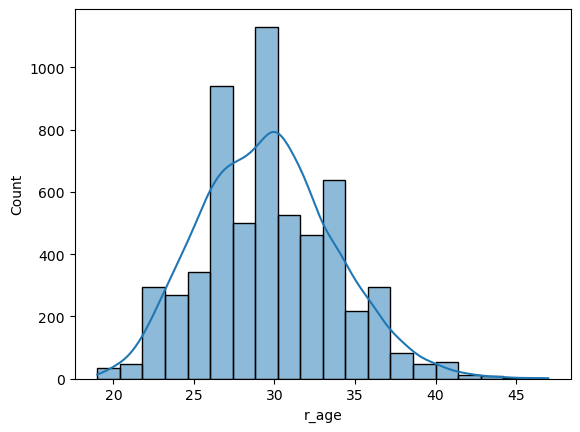

In [27]:
# Checking for extreme values in the data set variables
sns.histplot(df_UFC['r_age'], bins=20, kde = True) # shows extreme values for 'red corner fighter age'


<Axes: xlabel='b_age', ylabel='Count'>

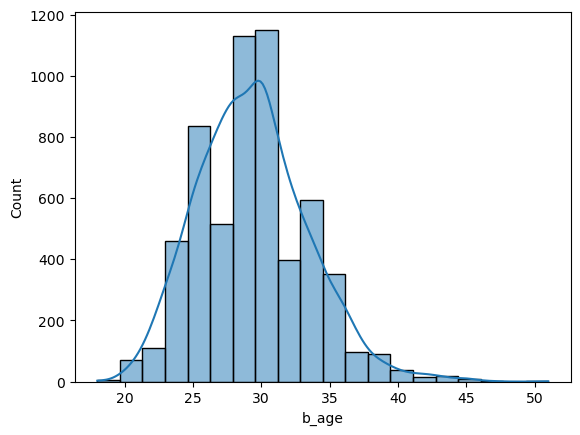

In [28]:
# Checking for extreme values in the data set variables
sns.histplot(df_UFC['b_age'], bins=20, kde = True) # shows extreme values for 'blue corner fighter age'


<Axes: xlabel='r_win_tko', ylabel='Count'>

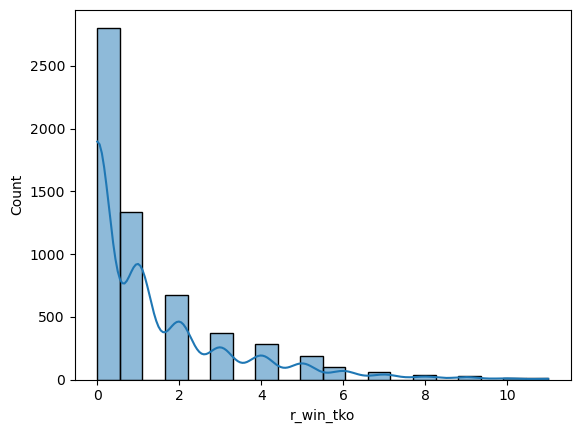

In [29]:
# Checking for extreme values in the data set variables
sns.histplot(df_UFC['r_win_tko'], bins=20, kde = True) # shows extreme values for 'red corner tko'


<Axes: xlabel='b_win_tko', ylabel='Count'>

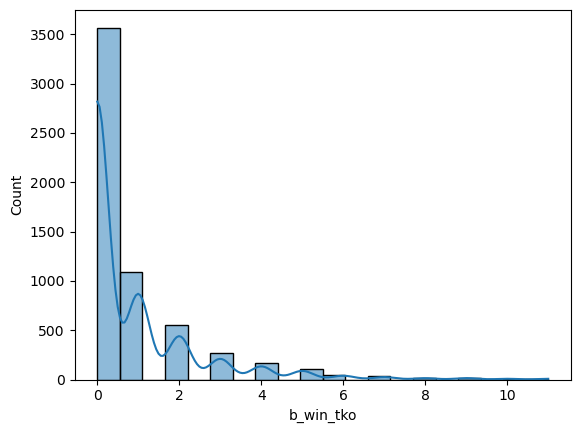

In [30]:
# Checking for extreme values in the data set variables
sns.histplot(df_UFC['b_win_tko'], bins=20, kde = True) # shows extreme values for 'blue corner tko'


## 07. Create cloropleth map with variable of choice

In [31]:
df_red_age_usa = df_UFC.groupby(['state'], as_index=False)['r_age'].mean()
df_red_age_usa.head()

,state,r_age
0,Abu Dhabi,30.235294
1,Alabama,28.173913
2,Alberta,30.636364
3,Arizona,30.700000
4,Berlin,27.454545


### What is the average age for red corner fighter per states in the USA?

In [32]:
df_UFC['r_age'].describe()

count    5901.000000
mean       29.589731
std         4.149734
min        19.000000
25%        27.000000
50%        29.000000
75%        32.000000
max        47.000000
Name: r_age, dtype: float64

In [33]:
#setting up map

map = folium.Map(location = [40, -95], zoom_start = 4)

folium.Choropleth(
    geo_data = us_states_geo, 
    data = df_red_age_usa,
    columns = ['state', 'r_age'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Average Age of Red Fighter per State in the USA").add_to(map)

folium.LayerControl().add_to(map)

map


### What is the average age for blue corner fighter per state in the USA?

In [34]:
df_UFC['b_age'].describe()

count    5901.000000
mean       29.359092
std         4.088473
min        18.000000
25%        26.000000
50%        29.000000
75%        32.000000
max        51.000000
Name: b_age, dtype: float64

In [35]:
df_blue_age_usa = df_UFC.groupby(['state'], as_index=False)['b_age'].mean()
df_blue_age_usa.head()

,state,b_age
0,Abu Dhabi,30.215686
1,Alabama,30.521739
2,Alberta,28.931818
3,Arizona,29.880000
4,Berlin,28.454545


In [36]:
#setting up map

map = folium.Map(location = [40, -95], zoom_start = 4)

folium.Choropleth(
    geo_data = us_states_geo, 
    data = df_blue_age_usa,
    columns = ['state', 'b_age'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Average Age of Blue Fighter per State in the USA").add_to(map)

folium.LayerControl().add_to(map)

map


### What is the average weight of red corner fighters per state in the USA?

In [37]:
df_UFC['r_weight_lbs'].describe()

count    5901.000000
mean      170.690561
std        35.715678
min       115.000000
25%       145.000000
50%       170.000000
75%       185.000000
max       345.000000
Name: r_weight_lbs, dtype: float64

In [38]:
df_red_lbs_usa = df_UFC.groupby(['state'], as_index=False)['r_weight_lbs'].mean()
df_red_lbs_usa.head()

,state,r_weight_lbs
0,Abu Dhabi,164.392157
1,Alabama,219.500000
2,Alberta,156.204545
3,Arizona,165.160000
4,Berlin,150.000000


In [39]:
#setting up map

map = folium.Map(location = [40, -95], zoom_start = 4)

folium.Choropleth(
    geo_data = us_states_geo, 
    data = df_red_lbs_usa,
    columns = ['state', 'r_weight_lbs'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Average Weight in lbs of Red Fighter per State in the USA").add_to(map)

folium.LayerControl().add_to(map)

map


### What is the average weight of blue corner fighters per state?

In [40]:
df_UFC['b_weight_lbs'].describe()

count    5901.000000
mean      170.455177
std        35.991989
min       115.000000
25%       145.000000
50%       170.000000
75%       185.000000
max       410.000000
Name: b_weight_lbs, dtype: float64

In [41]:
df_blue_lbs_usa = df_UFC.groupby(['state'], as_index=False)['b_weight_lbs'].mean()
df_blue_lbs_usa.head()

,state,b_weight_lbs
0,Abu Dhabi,162.928105
1,Alabama,221.000000
2,Alberta,155.795455
3,Arizona,165.340000
4,Berlin,149.090909


In [42]:
#setting up map

map = folium.Map(location = [40, -95], zoom_start = 4)

folium.Choropleth(
    geo_data = us_states_geo, 
    data = df_blue_lbs_usa,
    columns = ['state', 'b_weight_lbs'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Average Weight in lbs of Blue Fighter per State in the USA").add_to(map)

folium.LayerControl().add_to(map)

map


In [43]:
df_red_age_all = df_UFC[['state','r_age']]
df_red_age_all.head()


,state,r_age
0,Colorado,27
1,Colorado,30
2,Colorado,27
3,Colorado,30
4,Colorado,30


### Distribution of red corner fighter age by state

In [44]:
#setting up map

map = folium.Map(location = [40, -95], zoom_start = 4)

folium.Choropleth(
    geo_data = us_states_geo, 
    data = df_red_age_all,
    columns = ['state', 'r_age'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Age Range of Red Fighter per State in the USA").add_to(map)

folium.LayerControl().add_to(map)

map


In [45]:
df_blue_age_all = df_UFC[['state','b_age']]
df_blue_age_all.head()

,state,b_age
0,Colorado,30
1,Colorado,31
2,Colorado,28
3,Colorado,36
4,Colorado,39


### Distribution of blue corner fighter age by state

In [46]:
#setting up map

map = folium.Map(location = [40, -95], zoom_start = 4)

folium.Choropleth(
    geo_data = us_states_geo, 
    data = df_blue_age_all,
    columns = ['state', 'b_age'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Age Range of Blue Fighter per State in the USA").add_to(map)

folium.LayerControl().add_to(map)

map


In [47]:
df_red_age_world = df_UFC.groupby(['country'], as_index=False)['r_age'].mean()
df_red_age_world.head()

,country,r_age
0,Argentina,31.000000
1,Australia,30.226190
2,Brazil,30.484706
3,Canada,30.266667
4,Chile,28.846154


### What is the average age for red corner fighter per country worldwide?

In [48]:
df_UFC['r_age'].describe()

count    5901.000000
mean       29.589731
std         4.149734
min        19.000000
25%        27.000000
50%        29.000000
75%        32.000000
max        47.000000
Name: r_age, dtype: float64

In [49]:
#setting up map

map = folium.Map(location = [32, -15], zoom_start = 2)

folium.Choropleth(
    geo_data = world_geo, 
    data = df_red_age_world,
    columns = ['country', 'r_age'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Average Age of Red Fighter per Country").add_to(map)

folium.LayerControl().add_to(map)

map


### What is the average age for blue corner fighter per country worldwide?

In [50]:
df_UFC['b_age'].describe()

count    5901.000000
mean       29.359092
std         4.088473
min        18.000000
25%        26.000000
50%        29.000000
75%        32.000000
max        51.000000
Name: b_age, dtype: float64

In [51]:
df_blue_age_world = df_UFC.groupby(['country'], as_index=False)['b_age'].mean()
df_blue_age_world.head()

,country,b_age
0,Argentina,29.083333
1,Australia,29.380952
2,Brazil,29.557647
3,Canada,29.316667
4,Chile,30.692308


In [52]:
#setting up map

map = folium.Map(location = [32, -15], zoom_start = 2)

folium.Choropleth(
    geo_data = world_geo, 
    data = df_blue_age_world,
    columns = ['country', 'b_age'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Average Age of Blue Fighter per Country").add_to(map)

folium.LayerControl().add_to(map)

map

### What is the average weight of red corner fighters per country worldwide?

In [53]:
df_red_lbs_world = df_UFC.groupby(['country'], as_index=False)['r_weight_lbs'].mean()
df_red_lbs_world.head()

,country,r_weight_lbs
0,Argentina,156.250000
1,Australia,173.232143
2,Brazil,166.127059
3,Canada,167.622222
4,Chile,148.846154


In [54]:
df_UFC['r_weight_lbs'].describe()

count    5901.000000
mean      170.690561
std        35.715678
min       115.000000
25%       145.000000
50%       170.000000
75%       185.000000
max       345.000000
Name: r_weight_lbs, dtype: float64

In [55]:
#setting up map

map = folium.Map(location = [32, -15], zoom_start = 2)

folium.Choropleth(
    geo_data = world_geo, 
    data = df_red_lbs_world,
    columns = ['country', 'r_weight_lbs'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Average Weight in lbs of Red Fighter per Country").add_to(map)

folium.LayerControl().add_to(map)

map

### What is the average weight of blue corner fighters per country worldwide?

In [56]:
df_blue_lbs_world = df_UFC.groupby(['country'], as_index=False)['b_weight_lbs'].mean()
df_blue_lbs_world.head()

,country,b_weight_lbs
0,Argentina,154.583333
1,Australia,173.535714
2,Brazil,165.376471
3,Canada,167.805556
4,Chile,146.153846


In [57]:
df_UFC['b_weight_lbs'].describe()

count    5901.000000
mean      170.455177
std        35.991989
min       115.000000
25%       145.000000
50%       170.000000
75%       185.000000
max       410.000000
Name: b_weight_lbs, dtype: float64

In [58]:
#setting up map

map = folium.Map(location = [32, -15], zoom_start = 2)

folium.Choropleth(
    geo_data = world_geo, 
    data = df_blue_lbs_world,
    columns = ['country', 'b_weight_lbs'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Average Weight in lbs of Blue Fighter per Country").add_to(map)

folium.LayerControl().add_to(map)

map

## 08. Discuss the results and what they mean in a markdown section.
Does the analysis answer any of your existing research questions?
Does the analysis lead you to any new research questions?

### The visual analysis confirms the earlier data analyis and stats of both red corner and blue corner fighters having an average age of 30 years old throughout the United States. The average weight was also confirmed from earlier analyis through visual presentation here to be the same around 168 lbs which corresponds to the Welterweight division 156-170. There seems to be no direct correlation between states and weight or states and age with the exception of Florida. For both red and blue corner fighters Florida has oldest age range for both groups. Viewing world results of age Russia and South America for both red and blue fighters has a higher end of average age per fighter. China for both fighters and worldwide has the lowest average age for fighting there. There seems to be a possible direct correlation of age of the fighter and weight from a previous hypothesis posed. In the world map China has the youngest fighters and the lowest average weight for fights happening there. Russia has the oldest average age fighters and the highest average weight. Mexico and Argentina are also points of interest similar to China stats for weight and age correlation. 


### I would want to know why is welterweight the most popular weight class? Also would like to review why the age range of 30 is the average age of all fighters? Does getting older remove fighters from the welterweight age group to the higher weight classes as age can be associated with gaining weight. Why is the worldwide average lowest age for fights in China for both corners? Why is the worldwide highest average age of fighter for bouts in Russia and South America for both corners. Explore the worldwide avg of weight and age correlation for fights in China, Mexico, Argentina for low averages and Russia for high averages. 